# Predicting House Prices using Kaggle Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

path="Housing.csv"
df=pd.read_csv(path)

In [ ]:
#Printing first 5 rows of dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [110]:
#Method to check if there are null values in the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Observation: Dataset has no missing values

In [ ]:
#Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Feature Engineering

In [ ]:
#Selecting object data columns for feature engineering
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [140]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.head()
df_encoded.dtypes

df_encoded=df_encoded.drop_duplicates()

In [113]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [114]:
# Drop redundant one-hot encoded columns
df_encoded


,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


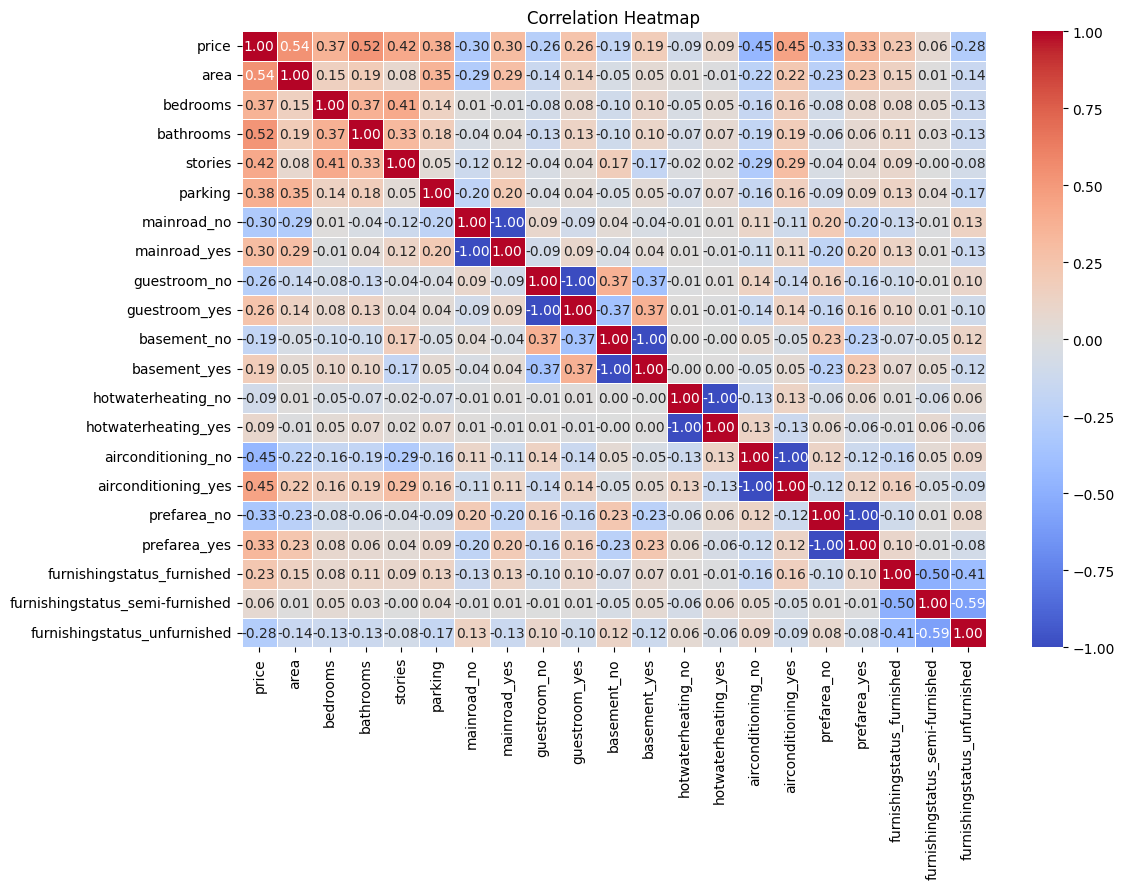

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))  # Set the size of the figure (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')  # Title for the heatmap
plt.show()

In [116]:
    # Create new features (e.g., price per area, total number of rooms)
df_encoded['price_per_area'] = df_encoded['price'] / df_encoded['area']


df_encoded['total_rooms'] = df_encoded['bedrooms'] + df_encoded['bathrooms']
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_area,total_rooms
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1792.452830,6
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1367.187500,8
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1229.919679,5
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1628.666667,6
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1537.735849,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,606.666667,3
541,1767150,2400,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,736.312500,4
542,1750000,3620,2,1,1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,483.425414,3
543,1750000,2910,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,601.374570,4


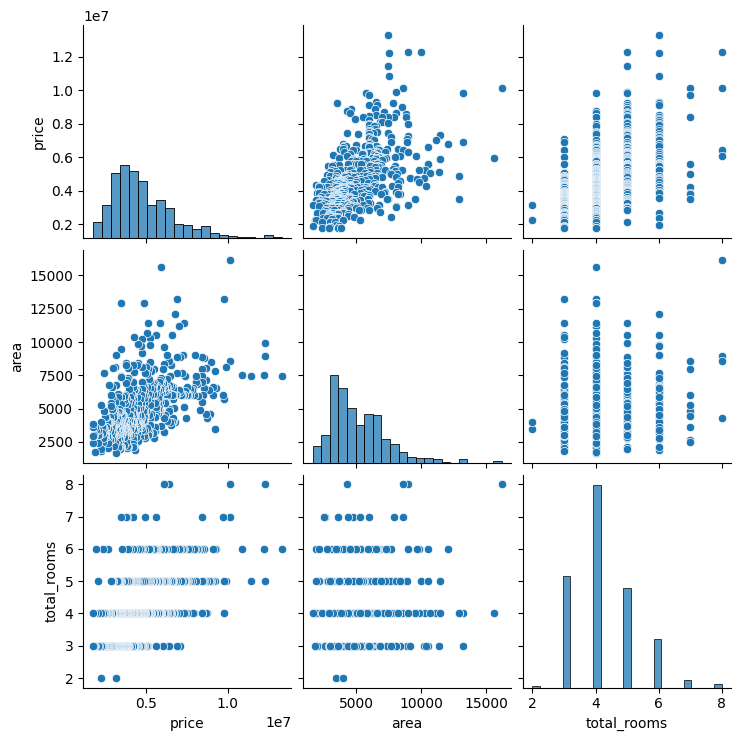

In [117]:
sns.pairplot(df_encoded[['price', 'area', 'total_rooms']])
plt.show()


In [118]:
#splitting data in x and y
X=df_encoded.drop(columns="price")
y=pd.DataFrame(df_encoded["price"])

print(X.shape)
print(y.shape)
print(y.dtypes)
print(y)
print(X)

(545, 22)
(545, 1)
price    int64
dtype: object
        price
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
..        ...
540   1820000
541   1767150
542   1750000
543   1750000
544   1750000

[545 rows x 1 columns]
     area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0    7420         4          2        3        2          0.0           1.0   
1    8960         4          4        4        3          0.0           1.0   
2    9960         3          2        2        2          0.0           1.0   
3    7500         4          2        2        3          0.0           1.0   
4    7420         4          1        2        2          0.0           1.0   
..    ...       ...        ...      ...      ...          ...           ...   
540  3000         2          1        1        2          0.0           1.0   
541  2400         3          1        1        0          1.0           0.0   
542  3620         2          1        1        0 

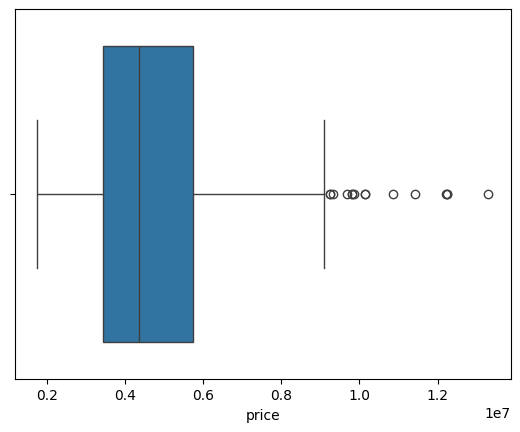

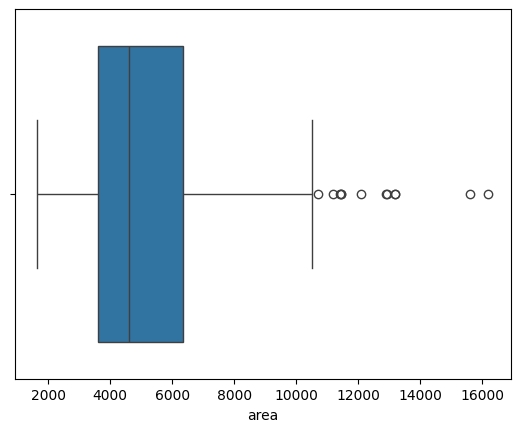

In [119]:
# Boxplot for visualizing outliers in 'price'
sns.boxplot(x=df_encoded['price'])
plt.show()

# Similarly, you can check for outliers in other numerical columns
sns.boxplot(x=df_encoded['area'])
plt.show()


In [120]:
from sklearn.model_selection import train_test_split
#splitting the data in to training and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

#Printing the shape of the test and train data
print("Training data shape",x_train.shape,y_train.shape)
print("Testing data shape", x_test.shape,y_test.shape)
print(y_train)

Training data shape (436, 22) (436, 1)
Testing data shape (109, 22) (109, 1)
       price
46   7525000
93   6300000
335  3920000
412  3430000
471  3010000
..       ...
71   6755000
106  6160000
270  4340000
435  3290000
102  6195000

[436 rows x 1 columns]


Model Training 

In [121]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


c:\Users\Sohai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Model Valuation (Calculated Mean Absolute error between precicted and actual data)

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#testing the model
y_pred=model.predict(x_test)


In [123]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 290769.43577981653
Mean Squared Error (MSE): 343217196789.4286
Root Mean Squared Error (RMSE): 585847.4176689939
R-squared (R²): 0.9320976502331506


In [124]:
# Calculate the mean of the actual prices
mean_price = y_test.mean()

# Calculate the relative MAE (percentage)
relative_mae = (mae / mean_price) * 100
print(relative_mae)


price    5.806636
dtype: float64


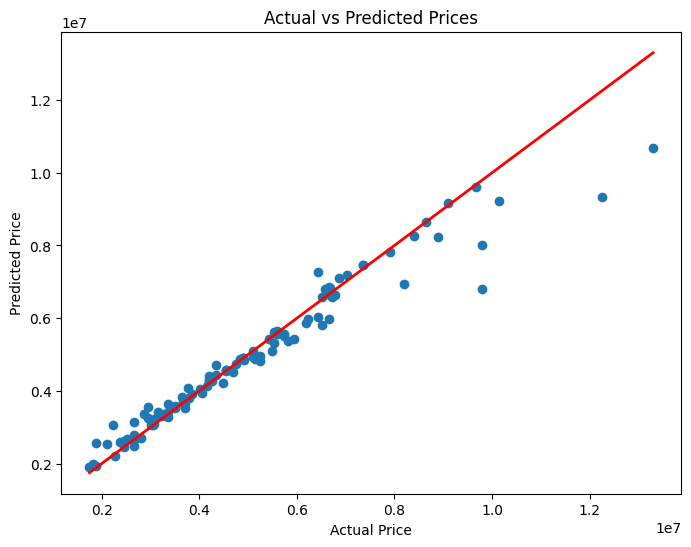

In [125]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [126]:
# Calculate training MAE
y_train_pred = model.predict(x_train)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Compare training and testing MAE
print(f'Training MAE: {train_mae}')
print(f'Testing MAE: {mae}')


Training MAE: 80267.7123853211
Testing MAE: 290769.43577981653
